In [ ]:
# ============================================
# 새 노트북: Hierarchical Clustering 전용
# 메모리 최적화 버전
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

# 시각화 설정
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 60)
print("Hierarchical Clustering Analysis")
print("메모리 최적화 버전")
print("=" * 60)

# 데이터 로드
data_path = '/content/drive/MyDrive/개인프로젝트 영상/데이터분석_머신러닝/data/HierachicalClustering_과제_data/'

print("\n📂 데이터 로딩 중...")
final_clustering_data = pd.read_csv(data_path + 'clustering_data_scaled.csv')
final_original_data = pd.read_csv(data_path + 'original_data_with_features.csv')

print(f"\n원본 데이터 크기:")
print(f"   Clustering 데이터: {final_clustering_data.shape}")
print(f"   원본 데이터: {final_original_data.shape}")

Hierarchical Clustering Analysis
메모리 최적화 버전

📂 데이터 로딩 중...

원본 데이터 크기:
   Clustering 데이터: (93358, 35)
   원본 데이터: (93358, 39)


In [ ]:
# ============================================
# 🔥 핵심: 전체 데이터 샘플링
# ============================================

# 코랩 무료 버전 한계: 2만~3만명이 안전
CLUSTERING_SAMPLE_SIZE = 25000  # 2.5만명 (조정 가능: 20000~30000)

print(f"\n" + "=" * 60)
print(f"메모리 절약을 위한 전체 데이터 샘플링")
print("=" * 60)

if len(final_clustering_data) > CLUSTERING_SAMPLE_SIZE:
    print(f"\n⚠️ RAM 한계를 고려한 샘플링 수행")
    print(f"   원본: {len(final_clustering_data):,}명")
    print(f"   샘플: {CLUSTERING_SAMPLE_SIZE:,}명")
    print(f"   샘플링 비율: {CLUSTERING_SAMPLE_SIZE/len(final_clustering_data)*100:.1f}%")

    # 계층화 샘플링 (더 대표성 있게)
    # RFM 기반으로 계층 나누기
    np.random.seed(42)

    # 간단한 랜덤 샘플링
    sample_indices = np.random.choice(len(final_clustering_data), CLUSTERING_SAMPLE_SIZE, replace=False)
    sample_indices = np.sort(sample_indices)  # 정렬 (인덱스 매칭용)

    # 샘플 데이터 생성
    final_clustering_data_sampled = final_clustering_data.iloc[sample_indices].reset_index(drop=True)
    final_original_data_sampled = final_original_data.iloc[sample_indices].reset_index(drop=True)

    print(f"\n✅ 샘플링 완료!")
    print(f"   샘플 데이터: {final_clustering_data_sampled.shape}")

    # 샘플 데이터를 메인으로 사용
    final_clustering_data = final_clustering_data_sampled
    final_original_data = final_original_data_sampled

else:
    print(f"\n✅ 데이터 크기 적당, 전체 사용")


메모리 절약을 위한 전체 데이터 샘플링

⚠️ RAM 한계를 고려한 샘플링 수행
   원본: 93,358명
   샘플: 25,000명
   샘플링 비율: 26.8%

✅ 샘플링 완료!
   샘플 데이터: (25000, 35)


In [ ]:
# 최종 데이터
data_for_clustering = final_clustering_data.values

print(f"\n📊 최종 Clustering 데이터:")
print(f"   고객 수: {len(data_for_clustering):,}")
print(f"   특성 수: {data_for_clustering.shape[1]}개")
print(f"   메모리 사용량 (예상): ~{data_for_clustering.nbytes / 1024 / 1024:.1f} MB")


📊 최종 Clustering 데이터:
   고객 수: 25,000
   특성 수: 35개
   메모리 사용량 (예상): ~6.7 MB


In [ ]:
# ============================================
# 6.1 Linkage 계산
# ============================================

print("\n" + "=" * 60)
print("6.1 Linkage 계산")
print("=" * 60)

print("\n🔄 Ward Linkage 계산 중...")
print("   (시간이 좀 걸릴 수 있습니다...)")

import time
start_time = time.time()

ward_linkage = linkage(data_for_clustering, method='ward')

elapsed_time = time.time() - start_time
print(f"✅ Linkage 계산 완료! (소요 시간: {elapsed_time:.1f}초)")


6.1 Linkage 계산

🔄 Ward Linkage 계산 중...
   (시간이 좀 걸릴 수 있습니다...)
✅ Linkage 계산 완료! (소요 시간: 83.9초)



6.2 덴드로그램 시각화

💡 덴드로그램은 3,000명 샘플로 그립니다


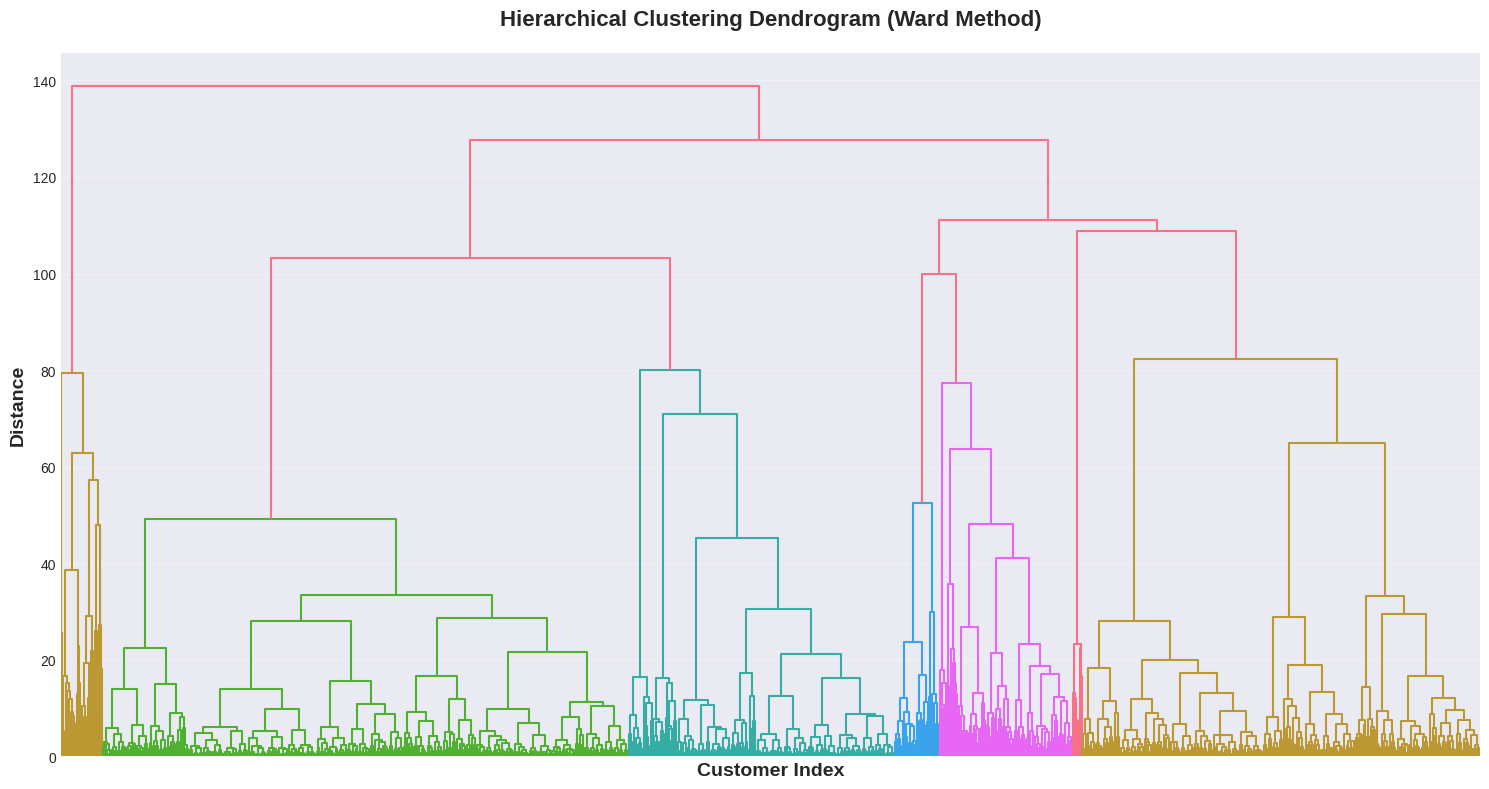

In [ ]:
# ============================================
# 6.2 덴드로그램 그리기
# ============================================

print("\n" + "=" * 60)
print("6.2 덴드로그램 시각화")
print("=" * 60)

# 덴드로그램용 추가 샘플링 (너무 많으면 느림)
MAX_FOR_DENDROGRAM = 3000

if len(data_for_clustering) > MAX_FOR_DENDROGRAM:
    print(f"\n💡 덴드로그램은 {MAX_FOR_DENDROGRAM:,}명 샘플로 그립니다")
    dendro_indices = np.random.choice(len(data_for_clustering), MAX_FOR_DENDROGRAM, replace=False)
    dendro_data = data_for_clustering[dendro_indices]
    dendro_linkage = linkage(dendro_data, method='ward')
else:
    dendro_linkage = ward_linkage

plt.figure(figsize=(15, 8))
dendrogram(dendro_linkage, no_labels=True)
plt.xlabel('Customer Index', fontsize=14, fontweight='bold')
plt.ylabel('Distance', fontsize=14, fontweight='bold')
plt.title('Hierarchical Clustering Dendrogram (Ward Method)', fontsize=16, fontweight='bold', pad=20)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# ============================================
# 6.3 최적 클러스터 개수 결정 (간소화 버전)
# ============================================

print("\n" + "=" * 60)
print("6.3 최적 클러스터 개수 결정")
print("=" * 60)

# 2~8개만 시도 (10개까지 하면 메모리 부담)
n_clusters_range = range(2, 9)

scores = {
    'n_clusters': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

print("\n🔄 클러스터 개수별 평가 중...")
for n in n_clusters_range:
    print(f"   {n}개 클러스터...", end=' ')

    # 클러스터 할당
    clusters = fcluster(ward_linkage, n, criterion='maxclust')

    # 메모리 효율적인 지표만 계산
    db_index = davies_bouldin_score(data_for_clustering, clusters)
    ch_score = calinski_harabasz_score(data_for_clustering, clusters)

    scores['n_clusters'].append(n)
    scores['davies_bouldin'].append(db_index)
    scores['calinski_harabasz'].append(ch_score)

    print("✅")

print("\n✅ 평가 완료!")


6.3 최적 클러스터 개수 결정

🔄 클러스터 개수별 평가 중...
   2개 클러스터... ✅
   3개 클러스터... ✅
   4개 클러스터... ✅
   5개 클러스터... ✅
   6개 클러스터... ✅
   7개 클러스터... ✅
   8개 클러스터... ✅

✅ 평가 완료!


In [ ]:
# 결과
scores_df = pd.DataFrame(scores)
print("\n📊 클러스터 개수별 평가 점수:")
print(scores_df.to_string(index=False))


📊 클러스터 개수별 평가 점수:
 n_clusters  davies_bouldin  calinski_harabasz
          2        1.411150        2732.582855
          3        1.340527        2777.437658
          4        1.867543        2790.850631
          5        1.724777        2825.730532
          6        1.523097        2898.142546
          7        1.479354        2947.865077
          8        1.366706        2919.433467


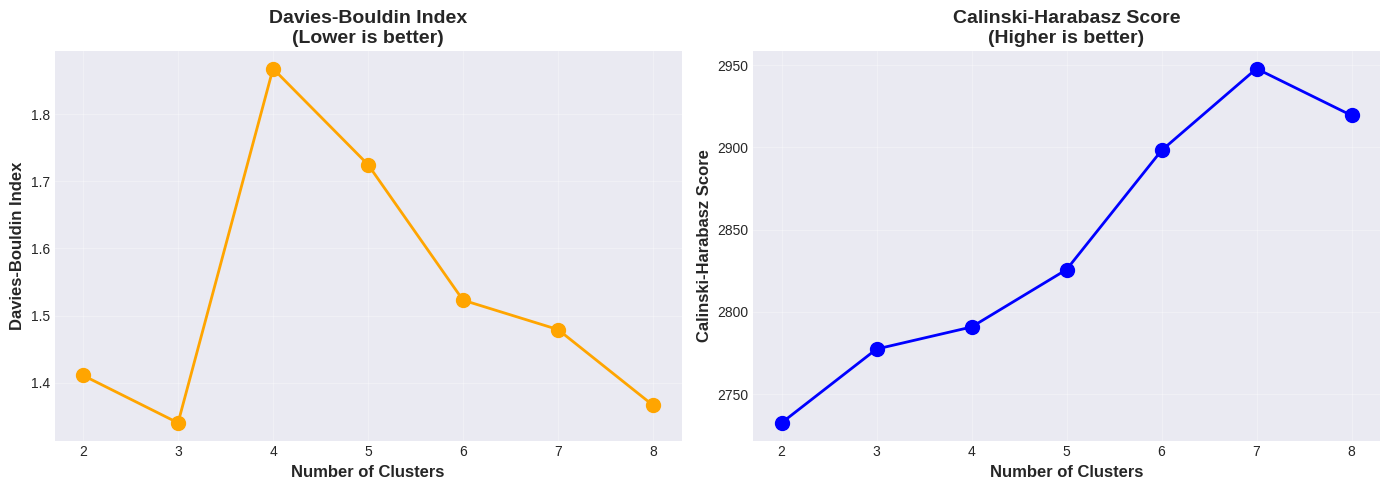

In [ ]:
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Davies-Bouldin Index (낮을수록 좋음)
axes[0].plot(scores_df['n_clusters'], scores_df['davies_bouldin'], 'o-', linewidth=2, markersize=10, color='orange')
axes[0].set_xlabel('Number of Clusters', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Davies-Bouldin Index', fontsize=12, fontweight='bold')
axes[0].set_title('Davies-Bouldin Index\n(Lower is better)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].set_xticks(n_clusters_range)

# 2. Calinski-Harabasz Score (높을수록 좋음)
axes[1].plot(scores_df['n_clusters'], scores_df['calinski_harabasz'], 'o-', linewidth=2, markersize=10, color='blue')
axes[1].set_xlabel('Number of Clusters', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Calinski-Harabasz Score', fontsize=12, fontweight='bold')
axes[1].set_title('Calinski-Harabasz Score\n(Higher is better)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].set_xticks(n_clusters_range)

plt.tight_layout()
plt.show()

In [ ]:
# 추천
best_db = scores_df.loc[scores_df['davies_bouldin'].idxmin()]
best_ch = scores_df.loc[scores_df['calinski_harabasz'].idxmax()]

print("\n💡 추천 클러스터 개수:")
print(f"   - Davies-Bouldin 기준: {int(best_db['n_clusters'])}개")
print(f"   - Calinski-Harabasz 기준: {int(best_ch['n_clusters'])}개")

# 최종 추천
recommended_n_clusters = int(best_ch['n_clusters'])
print(f"\n⭐ 최종 추천: {recommended_n_clusters}개 클러스터")


💡 추천 클러스터 개수:
   - Davies-Bouldin 기준: 3개
   - Calinski-Harabasz 기준: 7개

⭐ 최종 추천: 7개 클러스터


In [ ]:
# ============================================
# 6.4 최종 클러스터 할당
# ============================================

print("\n" + "=" * 60)
print("6.4 최종 클러스터 할당")
print("=" * 60)

FINAL_N_CLUSTERS = recommended_n_clusters  # 수동 변경 가능

print(f"\n✅ 최종 선택: {FINAL_N_CLUSTERS}개 클러스터")


6.4 최종 클러스터 할당

✅ 최종 선택: 7개 클러스터


In [ ]:
# 클러스터 할당
final_clusters = fcluster(ward_linkage, FINAL_N_CLUSTERS, criterion='maxclust')

# 원본 데이터에 추가
final_original_data['cluster'] = final_clusters

print(f"\n📊 클러스터별 고객 수:")
cluster_counts = pd.Series(final_clusters).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(final_clusters)) * 100
    print(f"   Cluster {cluster_id}: {count:,}명 ({percentage:.1f}%)")


📊 클러스터별 고객 수:
   Cluster 1: 742명 (3.0%)
   Cluster 2: 769명 (3.1%)
   Cluster 3: 159명 (0.6%)
   Cluster 4: 6,329명 (25.3%)
   Cluster 5: 2,125명 (8.5%)
   Cluster 6: 9,703명 (38.8%)
   Cluster 7: 5,173명 (20.7%)


In [ ]:
# 품질 평가
final_db = davies_bouldin_score(data_for_clustering, final_clusters)
final_ch = calinski_harabasz_score(data_for_clustering, final_clusters)

print(f"""
\n📊 최종 클러스터링 품질:
   - Davies-Bouldin Index: {final_db:.3f} (낮을수록 좋음)
   - Calinski-Harabasz Score: {final_ch:.1f} (높을수록 좋음)
""")



📊 최종 클러스터링 품질:
   - Davies-Bouldin Index: 1.479 (낮을수록 좋음)
   - Calinski-Harabasz Score: 2947.9 (높을수록 좋음)



In [ ]:
print("\n✅ Step 6 완료!")
print(f"\n💾 다음 Step을 위해 결과 저장...")

# 결과 저장
final_original_data.to_csv('clustered_data.csv', index=False)
print("✅ clustered_data.csv 저장 완료!")

print("\n" + "=" * 60)
print("다음: Step 7 - 클러스터 프로파일링")
print("=" * 60)


✅ Step 6 완료!

💾 다음 Step을 위해 결과 저장...
✅ clustered_data.csv 저장 완료!

다음: Step 7 - 클러스터 프로파일링
